In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D



In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Dense, SimpleRNN, GRU, MaxPooling1D, Flatten, Bidirectional, Convolution1D, RepeatVector, TimeDistributed
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import datetime
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)

In [3]:
df =pd.read_csv("Varanasi.csv")

In [4]:
df.describe()

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
count,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000,137302.0,137302.000000,137302.000000,137302.000000,137302.000000,137302.000000
mean,25.784284,0.261074,18.830399,16.695165,100.856273,132.402733,91.894051,192.753689,203.641039,224.652984,35.551543,63.117374,0.0,994.064594,201.352027,2.537125,89.620901,0.190673
std,7.263002,98.017475,29.352519,7.368999,137.186800,227.870056,174.120736,280.084923,299.071097,316.093615,20.960010,23.475986,0.0,7.113308,98.673735,1.367639,42.735123,0.011407
min,4.600000,-180.000000,0.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,2.000000,0.0,975.400000,0.000000,0.000000,4.000000,0.170000
25%,20.900000,-89.000000,0.000000,11.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.100000,45.500000,0.0,988.200000,99.000000,1.600000,54.000000,0.180000
50%,26.700000,0.000000,0.000000,16.900000,6.000000,0.000000,0.000000,7.000000,6.000000,7.000000,29.400000,66.000000,0.0,994.000000,243.000000,2.300000,89.000000,0.190000
75%,30.300000,89.000000,31.800000,23.900000,197.750000,198.000000,91.000000,360.000000,372.000000,467.000000,56.800000,83.800000,0.0,999.900000,285.000000,3.100000,126.000000,0.200000
max,48.200000,180.000000,100.000000,28.600000,673.000000,1000.000000,884.000000,1029.000000,1110.000000,1033.000000,86.100000,99.900000,0.0,1014.700000,360.000000,12.000000,176.000000,0.220000


In [5]:
pd.to_datetime(df.PeriodEnd)

0        2007-01-01 02:00:00+00:00
1        2007-01-01 03:00:00+00:00
2        2007-01-01 04:00:00+00:00
3        2007-01-01 05:00:00+00:00
4        2007-01-01 06:00:00+00:00
                    ...           
137297   2022-08-30 19:00:00+00:00
137298   2022-08-30 20:00:00+00:00
137299   2022-08-30 21:00:00+00:00
137300   2022-08-30 22:00:00+00:00
137301   2022-08-30 23:00:00+00:00
Name: PeriodEnd, Length: 137302, dtype: datetime64[ns, UTC]

In [6]:
df['PeriodEnd'] =pd.to_datetime(df.PeriodEnd)

# Analysing the data in deep

In [7]:
df['PeriodStart'] =pd.to_datetime(df.PeriodStart)

In [8]:
new_df =df[['PeriodStart','AirTemp', 'DewpointTemp','PrecipitableWater','RelativeHumidity','SurfacePressure','WindDirection10m', 'WindSpeed10m']]

In [9]:
new_df

,PeriodStart,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m
0,2007-01-01 01:00:00+00:00,13.0,9.7,18.4,80.2,1002.1,175,0.7
1,2007-01-01 02:00:00+00:00,14.0,10.2,18.3,77.9,1002.7,195,0.7
2,2007-01-01 03:00:00+00:00,15.7,10.5,18.1,71.2,1003.0,224,0.7
3,2007-01-01 04:00:00+00:00,18.2,10.6,18.0,61.4,1003.1,258,0.9
4,2007-01-01 05:00:00+00:00,20.7,10.8,17.9,53.1,1003.1,276,1.2
...,...,...,...,...,...,...,...,...
137297,2022-08-30 18:00:00+00:00,29.2,23.2,64.4,70.1,997.7,249,2.3
137298,2022-08-30 19:00:00+00:00,28.8,23.1,64.3,71.6,997.2,243,2.5
137299,2022-08-30 20:00:00+00:00,28.1,23.3,64.4,75.2,996.7,235,2.5
137300,2022-08-30 21:00:00+00:00,27.5,23.4,64.4,77.9,996.2,235,2.3


In [10]:
new_df.dtypes

PeriodStart          datetime64[ns, UTC]
AirTemp                          float64
DewpointTemp                     float64
PrecipitableWater                float64
RelativeHumidity                 float64
SurfacePressure                  float64
WindDirection10m                   int64
WindSpeed10m                     float64
dtype: object

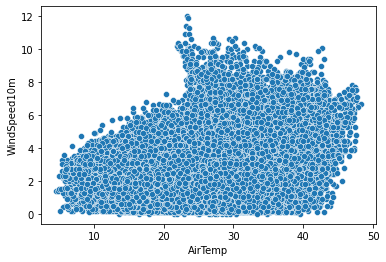

In [11]:
sns.scatterplot('AirTemp', 'WindSpeed10m', data=new_df);

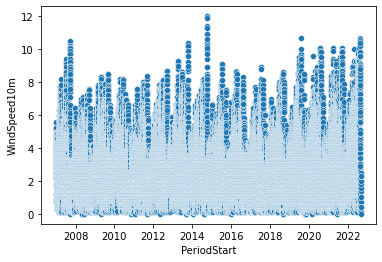

In [12]:
sns.scatterplot('PeriodStart', 'WindSpeed10m', data=new_df);

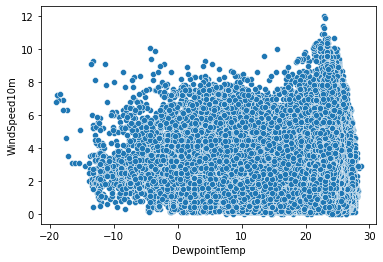

In [13]:
sns.scatterplot('DewpointTemp', 'WindSpeed10m', data=new_df);

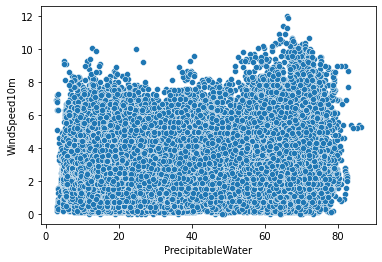

In [14]:
sns.scatterplot('PrecipitableWater', 'WindSpeed10m', data=new_df);

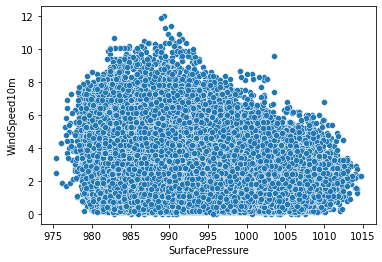

In [15]:
sns.scatterplot('SurfacePressure', 'WindSpeed10m', data=new_df);

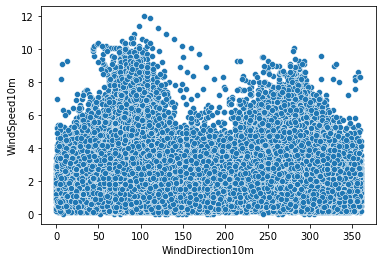

In [16]:
sns.scatterplot('WindDirection10m', 'WindSpeed10m', data=new_df);

In [17]:
new_df.corr()

,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m
AirTemp,1.000000,0.387471,0.481075,-0.474725,-0.670971,-0.097445,0.265247
DewpointTemp,0.387471,1.000000,0.873237,0.580648,-0.666375,-0.385496,0.001203
PrecipitableWater,0.481075,0.873237,1.000000,0.434148,-0.744954,-0.397740,0.124251
RelativeHumidity,-0.474725,0.580648,0.434148,1.000000,-0.087915,-0.277711,-0.198127
SurfacePressure,-0.670971,-0.666375,-0.744954,-0.087915,1.000000,0.236564,-0.226087
WindDirection10m,-0.097445,-0.385496,-0.397740,-0.277711,0.236564,1.000000,0.017429
WindSpeed10m,0.265247,0.001203,0.124251,-0.198127,-0.226087,0.017429,1.000000


In [18]:
new_df.set_index(new_df['PeriodStart'], drop=False, append=False, inplace=True, verify_integrity=False)

In [19]:
new_df

,PeriodStart,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m
PeriodStart,,,,,,,,
2007-01-01 01:00:00+00:00,2007-01-01 01:00:00+00:00,13.0,9.7,18.4,80.2,1002.1,175,0.7
2007-01-01 02:00:00+00:00,2007-01-01 02:00:00+00:00,14.0,10.2,18.3,77.9,1002.7,195,0.7
2007-01-01 03:00:00+00:00,2007-01-01 03:00:00+00:00,15.7,10.5,18.1,71.2,1003.0,224,0.7
2007-01-01 04:00:00+00:00,2007-01-01 04:00:00+00:00,18.2,10.6,18.0,61.4,1003.1,258,0.9
2007-01-01 05:00:00+00:00,2007-01-01 05:00:00+00:00,20.7,10.8,17.9,53.1,1003.1,276,1.2
...,...,...,...,...,...,...,...,...
2022-08-30 18:00:00+00:00,2022-08-30 18:00:00+00:00,29.2,23.2,64.4,70.1,997.7,249,2.3
2022-08-30 19:00:00+00:00,2022-08-30 19:00:00+00:00,28.8,23.1,64.3,71.6,997.2,243,2.5
2022-08-30 20:00:00+00:00,2022-08-30 20:00:00+00:00,28.1,23.3,64.4,75.2,996.7,235,2.5


In [20]:
new_df_copy =new_df.copy()

In [21]:
new_df_copy.drop("PeriodStart",inplace  =True ,axis =1)

In [22]:
y=new_df_copy['WindSpeed10m']

In [23]:
x=new_df_copy.drop("WindSpeed10m",axis =1)

In [24]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
scaler =StandardScaler()

In [26]:
x_train =scaler.fit_transform(x_train)
x_test =scaler.fit_transform(x_test)

In [ ]:
classifier =Sequential()
classifier.add(Dense(units =6,kernel_initializer ='he_uniform',activation ='relu',input_dim =6))
classifier.add(Dense(units =6,kernel_initializer ='he_uniform',activation ='relu'))
classifier.add(Dense(units =1,kernel_initializer ='he_uniform',activation ='sigmoid'))
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics =['accuracy'])
model_history =classifier.fit(x_train,y_train,validation_split=0.33,batch_size =10,epochs =100)

Epoch 1/100
7360/7360 [==============================] - 13s 2ms/step - loss: -826.2241 - accuracy: 0.0199 - val_loss: -3108.6069 - val_accuracy: 0.0195
Epoch 2/100
7360/7360 [==============================] - 12s 2ms/step - loss: -10503.8242 - accuracy: 0.0199 - val_loss: -22041.8477 - val_accuracy: 0.0195
Epoch 3/100
7360/7360 [==============================] - 12s 2ms/step - loss: -43483.3984 - accuracy: 0.0199 - val_loss: -71080.8516 - val_accuracy: 0.0195
Epoch 4/100
7360/7360 [==============================] - 11s 2ms/step - loss: -114205.4297 - accuracy: 0.0199 - val_loss: -166736.2969 - val_accuracy: 0.0195
Epoch 5/100
7360/7360 [==============================] - 11s 1ms/step - loss: -240269.8125 - accuracy: 0.0199 - val_loss: -326051.2812 - val_accuracy: 0.0195
Epoch 6/100
7360/7360 [==============================] - 11s 2ms/step - loss: -435925.3438 - accuracy: 0.0199 - val_loss: -553716.0000 - val_accuracy: 0.0195
Epoch 7/100
7360/7360 [==============================] - 11s 

7360/7360 [==============================] - 13s 2ms/step - loss: -324725856.0000 - accuracy: 0.0199 - val_loss: -334892800.0000 - val_accuracy: 0.0195
Epoch 52/100
7360/7360 [==============================] - 13s 2ms/step - loss: -344225376.0000 - accuracy: 0.0199 - val_loss: -354530592.0000 - val_accuracy: 0.0195
Epoch 53/100
7360/7360 [==============================] - 13s 2ms/step - loss: -364404416.0000 - accuracy: 0.0199 - val_loss: -375435424.0000 - val_accuracy: 0.0195
Epoch 54/100
7360/7360 [==============================] - 13s 2ms/step - loss: -385846432.0000 - accuracy: 0.0199 - val_loss: -397435264.0000 - val_accuracy: 0.0195
Epoch 55/100
7360/7360 [==============================] - 13s 2ms/step - loss: -408375776.0000 - accuracy: 0.0199 - val_loss: -420340320.0000 - val_accuracy: 0.0195
Epoch 56/100
7360/7360 [==============================] - 12s 2ms/step - loss: -431224864.0000 - accuracy: 0.0199 - val_loss: -443277024.0000 - val_accuracy: 0.0195
Epoch 57/100
7360/7360 

In [102]:
new_df.drop('PeriodStart',axis=1)

,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m
PeriodStart,,,,,,,
2007-01-01 01:00:00+00:00,13.0,9.7,18.4,80.2,1002.1,175,0.7
2007-01-01 02:00:00+00:00,14.0,10.2,18.3,77.9,1002.7,195,0.7
2007-01-01 03:00:00+00:00,15.7,10.5,18.1,71.2,1003.0,224,0.7
2007-01-01 04:00:00+00:00,18.2,10.6,18.0,61.4,1003.1,258,0.9
2007-01-01 05:00:00+00:00,20.7,10.8,17.9,53.1,1003.1,276,1.2
...,...,...,...,...,...,...,...
2022-08-30 18:00:00+00:00,29.2,23.2,64.4,70.1,997.7,249,2.3
2022-08-30 19:00:00+00:00,28.8,23.1,64.3,71.6,997.2,243,2.5
2022-08-30 20:00:00+00:00,28.1,23.3,64.4,75.2,996.7,235,2.5


C:\Users\upend\AppData\Local\Temp\ipykernel_6472\3708351065.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


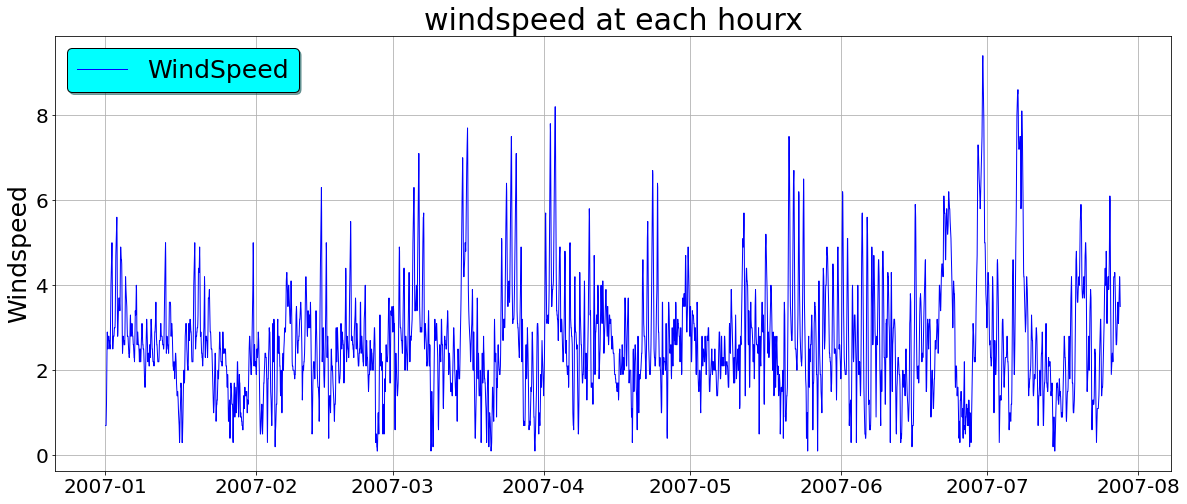

In [104]:
plt.figure(figsize = (20,8))
plt.grid(b=True, which='major', axis='both')
plt.title('windspeed at each hourx', fontsize = 30)
plt.plot(new_df.iloc[:5000].index, new_df.iloc[:5000]['WindSpeed10m'], color='blue', label='WindSpeed', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Windspeed', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [105]:
TS = new_df[['WindSpeed10m']] 

In [106]:
TS

,WindSpeed10m
PeriodStart,
2007-01-01 01:00:00+00:00,0.7
2007-01-01 02:00:00+00:00,0.7
2007-01-01 03:00:00+00:00,0.7
2007-01-01 04:00:00+00:00,0.9
2007-01-01 05:00:00+00:00,1.2
...,...
2022-08-30 18:00:00+00:00,2.3
2022-08-30 19:00:00+00:00,2.5
2022-08-30 20:00:00+00:00,2.5


In [130]:
TS_train = TS[TS.index < '2019']
TS_test = TS[TS.index > '2019']

In [110]:
TS_train,TS_test

(                           WindSpeed10m
 PeriodStart                            
 2007-01-01 01:00:00+00:00           0.7
 2007-01-01 02:00:00+00:00           0.7
 2007-01-01 03:00:00+00:00           0.7
 2007-01-01 04:00:00+00:00           0.9
 2007-01-01 05:00:00+00:00           1.2
 ...                                 ...
 2018-12-31 19:00:00+00:00           2.1
 2018-12-31 20:00:00+00:00           2.0
 2018-12-31 21:00:00+00:00           2.0
 2018-12-31 22:00:00+00:00           1.9
 2018-12-31 23:00:00+00:00           1.9
 
 [105191 rows x 1 columns],
                            WindSpeed10m
 PeriodStart                            
 2019-01-01 01:00:00+00:00           2.1
 2019-01-01 02:00:00+00:00           2.3
 2019-01-01 03:00:00+00:00           2.1
 2019-01-01 04:00:00+00:00           1.8
 2019-01-01 05:00:00+00:00           1.5
 ...                                 ...
 2022-08-30 18:00:00+00:00           2.3
 2022-08-30 19:00:00+00:00           2.5
 2022-08-30 20:00:00+00:00 

In [114]:
window_size = 100
X_train = []
y_train = []
for i in range(window_size, len(TS_train)):
    X_train.append(TS_train.iloc[i-window_size:i].values) 
    y_train.append(TS_train.iloc[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)

In [121]:
X_train[0]

array([[0.7],
       [0.7],
       [0.7],
       [0.9],
       [1.2],
       [1.7],
       [2.2],
       [2.7],
       [2.9],
       [2.7],
       [2.6],
       [2.5],
       [2.7],
       [2.8],
       [2.8],
       [2.8],
       [2.8],
       [2.7],
       [2.7],
       [2.6],
       [2.6],
       [2.5],
       [2.5],
       [2.7],
       [3.2],
       [3.7],
       [4. ],
       [4.2],
       [4.5],
       [4.7],
       [4.8],
       [5. ],
       [4.7],
       [3.8],
       [2.9],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.8],
       [2.8],
       [2.8],
       [2.9],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3.2],
       [3.8],
       [4.3],
       [4.7],
       [4.9],
       [5.1],
       [5.3],
       [5.5],
       [5.6],
       [5.2],
       [4.2],
       [3.2],
       [2.8],
       [2.9],
       [3.1],
       [3.3],
       [3.4],
       [3.6],
       [3.7],
       [3.7],
       [3.7],
       [3.6],
       [3.5],
       [3.4],
      

In [116]:
dataset_total = np.concatenate((TS_train, TS_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(TS_test) - window_size:]
X_test = []
y_test = []
for i in range(window_size, window_size+len(TS_test)):
    X_test.append(inputs[i-window_size:i, :]) 
    y_test.append(inputs[i, -1]) 

X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1, 1)

array([[[2.6],
        [2.5],
        [2.5],
        ...,
        [2. ],
        [1.9],
        [1.9]],

       [[2.5],
        [2.5],
        [2.4],
        ...,
        [1.9],
        [1.9],
        [2.1]],

       [[2.5],
        [2.4],
        [2.7],
        ...,
        [1.9],
        [2.1],
        [2.3]],

       ...,

       [[2.9],
        [3. ],
        [3.1],
        ...,
        [2. ],
        [2.3],
        [2.5]],

       [[3. ],
        [3.1],
        [3.1],
        ...,
        [2.3],
        [2.5],
        [2.5]],

       [[3.1],
        [3.1],
        [3.2],
        ...,
        [2.5],
        [2.5],
        [2.3]]])

In [120]:
model_1 = Sequential()
model_1.add(GRU(units=256, input_shape = (X_train.shape[1], X_train.shape[2])))
model_1.add(Dropout(0.5))
model_1.add(Dense(units=10))
model_1.add(Dense(units=1))
adamopt = Adam(lr=0.001)
model_1.compile(optimizer = adamopt, loss = 'mse')
earlystop = EarlyStopping(monitor = 'loss',
                          min_delta = 0,
                          patience = 5,
                          restore_best_weights = True)

model_1_history = model_1.fit(X_train, y_train, epochs = 100, callbacks = earlystop)

Epoch 1/100
3285/3285 [==============================] - 661s 199ms/step - loss: 0.0828
Epoch 2/100
3285/3285 [==============================] - 652s 198ms/step - loss: 0.0479
Epoch 3/100
3285/3285 [==============================] - 709s 216ms/step - loss: 0.0433
Epoch 4/100
3285/3285 [==============================] - 734s 224ms/step - loss: 0.0411
Epoch 5/100
3285/3285 [==============================] - 781s 238ms/step - loss: 0.0402
Epoch 6/100
3285/3285 [==============================] - 1426s 434ms/step - loss: 0.0392
Epoch 7/100
3285/3285 [==============================] - 302s 92ms/step - loss: 0.0386
Epoch 8/100
3285/3285 [==============================] - 378s 115ms/step - loss: 0.0374
Epoch 9/100
3285/3285 [==============================] - 387s 118ms/step - loss: 0.0454
Epoch 10/100
3285/3285 [==============================] - 390s 119ms/step - loss: 0.0387
Epoch 11/100
3285/3285 [==============================] - 394s 120ms/step - loss: 0.0351
Epoch 12/100
3285/3285 [======

1004/1004 [==============================] - 69s 68ms/step
RMSE : 0.4161216078056048


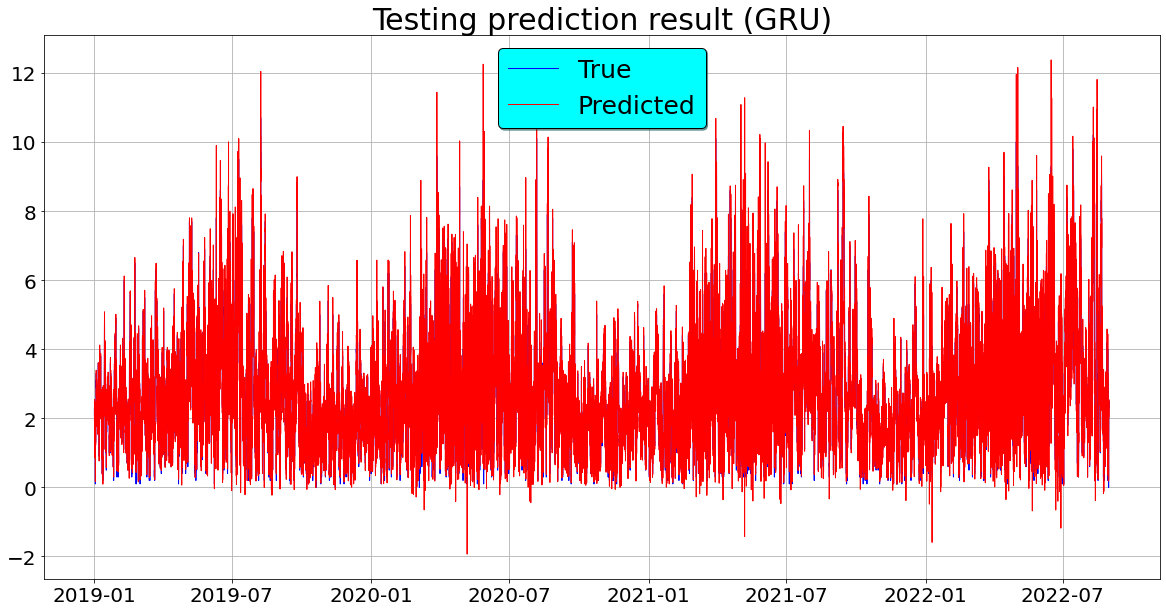

In [131]:
test_predict_1 = model_1.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_1)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (GRU)', fontsize = 30)
plt.plot(TS_test.index, y_test,linewidth = 1, label='True', color = 'blue')
plt.plot(TS_test.index, test_predict_1,linewidth = 1,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

1004/1004 [==============================] - 65s 64ms/step
RMSE : 0.4161216078056048


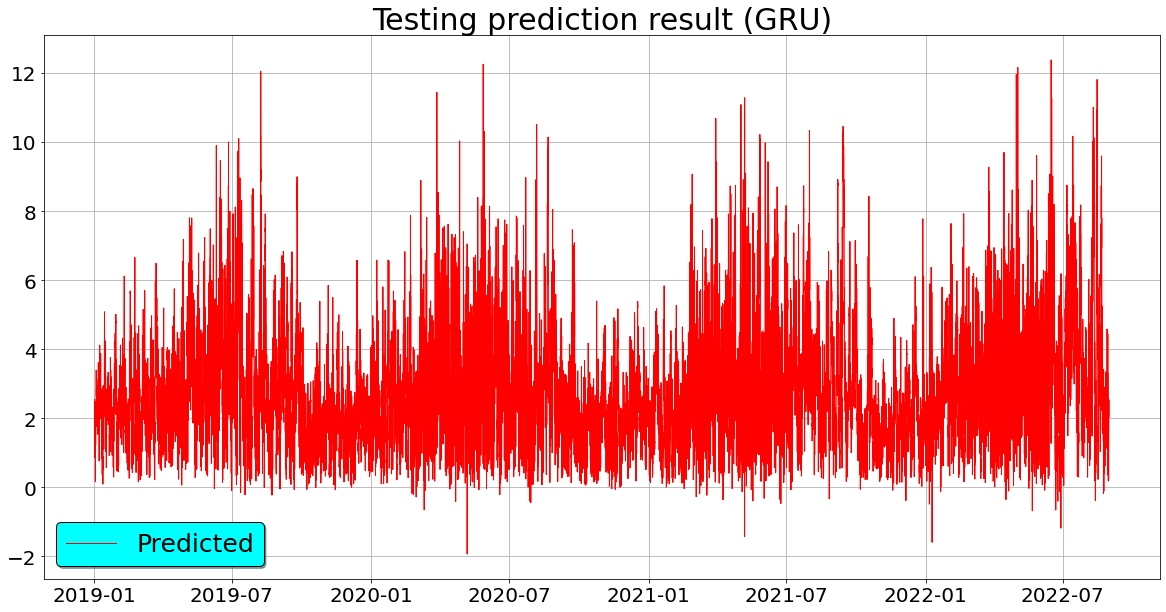

In [134]:
test_predict_1 = model_1.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_1)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (GRU)', fontsize = 30)
plt.plot(TS_test.index, test_predict_1,linewidth = 1,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

1004/1004 [==============================] - 66s 65ms/step
RMSE : 0.4161216078056048


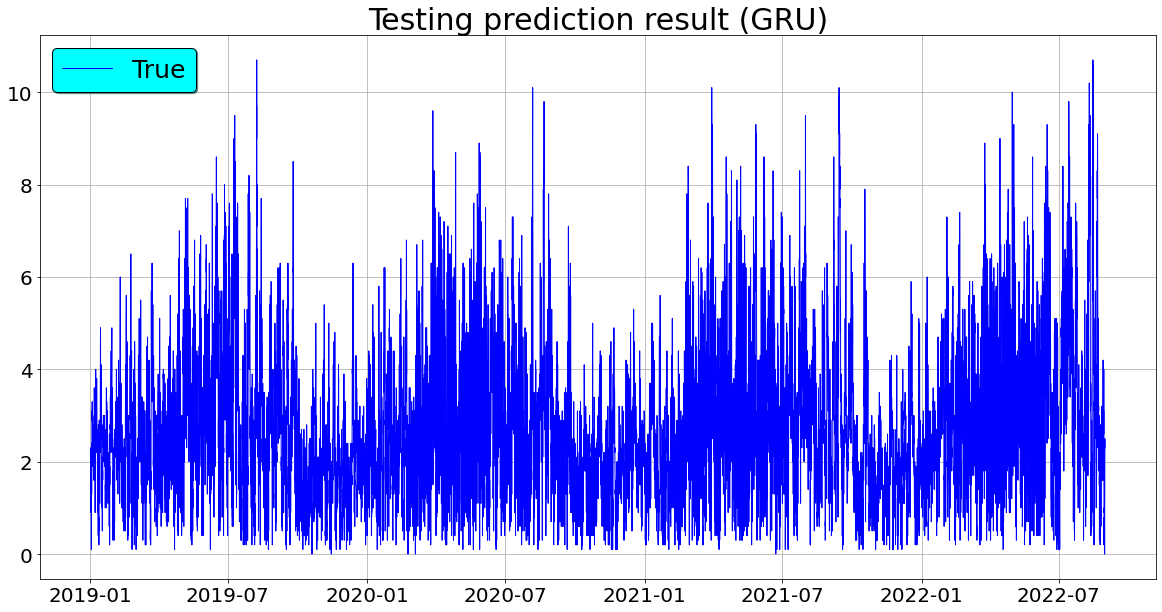

In [135]:
test_predict_1 = model_1.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_1)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (GRU)', fontsize = 30)
plt.plot(TS_test.index, y_test,linewidth = 1, label='True', color = 'blue')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

<AxesSubplot:xlabel='WindSpeed10m', ylabel='AirTemp'>

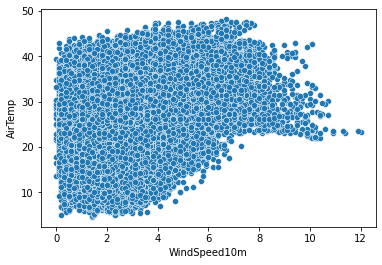

In [21]:
sns.scatterplot(x =df.WindSpeed10m,y =df.AirTemp)

In [22]:
df

,PeriodEnd,PeriodStart,Period,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,...,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
0,2007-01-01T02:00:00Z,2007-01-01T01:00:00Z,PT60M,13.0,-117,0.0,9.7,22,55,7,...,41,25,18.4,80.2,0.0,1002.1,175,0.7,87,0.20
1,2007-01-01T03:00:00Z,2007-01-01T02:00:00Z,PT60M,14.0,-125,0.0,10.2,99,274,72,...,241,265,18.3,77.9,0.0,1002.7,195,0.7,76,0.20
2,2007-01-01T04:00:00Z,2007-01-01T03:00:00Z,PT60M,15.7,-134,0.0,10.5,164,450,190,...,479,552,18.1,71.2,0.0,1003.0,224,0.7,65,0.20
3,2007-01-01T05:00:00Z,2007-01-01T04:00:00Z,PT60M,18.2,-147,0.0,10.6,207,555,305,...,674,631,18.0,61.4,0.0,1003.1,258,0.9,57,0.20
4,2007-01-01T06:00:00Z,2007-01-01T05:00:00Z,PT60M,20.7,-162,0.0,10.8,241,582,367,...,784,644,17.9,53.1,0.0,1003.1,276,1.2,51,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137297,2022-08-30T19:00:00Z,2022-08-30T18:00:00Z,PT60M,29.2,-1,92.0,23.2,0,0,0,...,0,0,64.4,70.1,0.0,997.7,249,2.3,145,0.18
137298,2022-08-30T20:00:00Z,2022-08-30T19:00:00Z,PT60M,28.8,-25,63.4,23.1,0,0,0,...,0,0,64.3,71.6,0.0,997.2,243,2.5,142,0.18
137299,2022-08-30T21:00:00Z,2022-08-30T20:00:00Z,PT60M,28.1,-44,61.6,23.3,0,0,0,...,0,0,64.4,75.2,0.0,996.7,235,2.5,134,0.18
137300,2022-08-30T22:00:00Z,2022-08-30T21:00:00Z,PT60M,27.5,-58,61.4,23.4,0,0,0,...,0,0,64.4,77.9,0.0,996.2,235,2.3,124,0.18


In [23]:
df.corr()

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
AirTemp,1.000000,0.250475,0.087523,0.387471,0.419257,0.315299,0.350886,0.423491,0.373826,0.424976,0.481075,-0.474725,NaN,-0.670971,-0.097445,0.265247,-0.505469,0.133576
Azimuth,0.250475,1.000000,-0.077347,-0.017828,0.031380,0.011350,-0.000853,0.014844,0.014625,0.019880,-0.002130,-0.253667,NaN,-0.101084,0.074240,0.080878,-0.004932,0.014298
CloudOpacity,0.087523,-0.077347,1.000000,0.315804,-0.059751,-0.327294,-0.299395,-0.215393,-0.229550,-0.245083,0.475916,0.249997,NaN,-0.190135,-0.171500,0.092975,-0.141869,-0.088111
DewpointTemp,0.387471,-0.017828,0.315804,1.000000,0.092754,-0.157804,-0.120830,-0.029684,-0.066624,-0.048648,0.873237,0.580648,NaN,-0.666375,-0.385496,0.001203,-0.158287,-0.121481
Dhi,0.419257,0.031380,-0.059751,0.092754,1.000000,0.600214,0.613502,0.871200,0.843973,0.842692,0.090064,-0.295185,NaN,-0.088415,0.060785,0.182146,-0.823498,0.047648
Dni,0.315299,0.011350,-0.327294,-0.157804,0.600214,1.000000,0.965549,0.894238,0.917983,0.929171,-0.191591,-0.433376,NaN,0.079936,0.180570,0.202612,-0.624091,0.013819
Ebh,0.350886,-0.000853,-0.299395,-0.120830,0.613502,0.965549,1.000000,0.922164,0.929913,0.915201,-0.139595,-0.417301,NaN,0.032091,0.154074,0.203554,-0.626682,0.021690
Ghi,0.423491,0.014844,-0.215393,-0.029684,0.871200,0.894238,0.922164,1.000000,0.991481,0.981706,-0.042671,-0.404009,NaN,-0.023356,0.125560,0.215750,-0.792947,0.036823
GtiFixedTilt,0.373826,0.014625,-0.229550,-0.066624,0.843973,0.917983,0.929913,0.991481,1.000000,0.975614,-0.090233,-0.403795,NaN,0.034613,0.144049,0.201123,-0.773438,0.018146
GtiTracking,0.424976,0.019880,-0.245083,-0.048648,0.842692,0.929171,0.915201,0.981706,0.975614,1.000000,-0.067442,-0.423514,NaN,-0.018684,0.139500,0.225043,-0.781943,0.032420


In [79]:
pd.to_datetime(df.PeriodEnd)

0        2007-01-01 02:00:00+00:00
1        2007-01-01 03:00:00+00:00
2        2007-01-01 04:00:00+00:00
3        2007-01-01 05:00:00+00:00
4        2007-01-01 06:00:00+00:00
                    ...           
137297   2022-08-30 19:00:00+00:00
137298   2022-08-30 20:00:00+00:00
137299   2022-08-30 21:00:00+00:00
137300   2022-08-30 22:00:00+00:00
137301   2022-08-30 23:00:00+00:00
Name: PeriodEnd, Length: 137302, dtype: datetime64[ns, UTC]

In [80]:
df['PeriodEnd'] =pd.to_datetime(df.PeriodEnd)

In [81]:
df['PeriodStart'] =pd.to_datetime(df.PeriodStart)

In [82]:
df.dtypes

PeriodEnd            datetime64[ns, UTC]
PeriodStart          datetime64[ns, UTC]
Period                            object
AirTemp                          float64
Azimuth                            int64
CloudOpacity                     float64
DewpointTemp                     float64
Dhi                                int64
Dni                                int64
Ebh                                int64
Ghi                                int64
GtiFixedTilt                       int64
GtiTracking                        int64
PrecipitableWater                float64
RelativeHumidity                 float64
SnowWater                        float64
SurfacePressure                  float64
WindDirection10m                   int64
WindSpeed10m                     float64
Zenith                             int64
AlbedoDaily                      float64
dtype: object

In [28]:
df.drop(columns ='Period',axis=1, inplace =True)

In [29]:
df['week_day'] = df.PeriodStart.dt.day_name()

In [30]:
df

,PeriodEnd,PeriodStart,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,...,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,week_day
0,2007-01-01 02:00:00+00:00,2007-01-01 01:00:00+00:00,13.0,-117,0.0,9.7,22,55,7,28,...,25,18.4,80.2,0.0,1002.1,175,0.7,87,0.20,Monday
1,2007-01-01 03:00:00+00:00,2007-01-01 02:00:00+00:00,14.0,-125,0.0,10.2,99,274,72,171,...,265,18.3,77.9,0.0,1002.7,195,0.7,76,0.20,Monday
2,2007-01-01 04:00:00+00:00,2007-01-01 03:00:00+00:00,15.7,-134,0.0,10.5,164,450,190,354,...,552,18.1,71.2,0.0,1003.0,224,0.7,65,0.20,Monday
3,2007-01-01 05:00:00+00:00,2007-01-01 04:00:00+00:00,18.2,-147,0.0,10.6,207,555,305,512,...,631,18.0,61.4,0.0,1003.1,258,0.9,57,0.20,Monday
4,2007-01-01 06:00:00+00:00,2007-01-01 05:00:00+00:00,20.7,-162,0.0,10.8,241,582,367,608,...,644,17.9,53.1,0.0,1003.1,276,1.2,51,0.20,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137297,2022-08-30 19:00:00+00:00,2022-08-30 18:00:00+00:00,29.2,-1,92.0,23.2,0,0,0,0,...,0,64.4,70.1,0.0,997.7,249,2.3,145,0.18,Tuesday
137298,2022-08-30 20:00:00+00:00,2022-08-30 19:00:00+00:00,28.8,-25,63.4,23.1,0,0,0,0,...,0,64.3,71.6,0.0,997.2,243,2.5,142,0.18,Tuesday
137299,2022-08-30 21:00:00+00:00,2022-08-30 20:00:00+00:00,28.1,-44,61.6,23.3,0,0,0,0,...,0,64.4,75.2,0.0,996.7,235,2.5,134,0.18,Tuesday
137300,2022-08-30 22:00:00+00:00,2022-08-30 21:00:00+00:00,27.5,-58,61.4,23.4,0,0,0,0,...,0,64.4,77.9,0.0,996.2,235,2.3,124,0.18,Tuesday


In [31]:
def hr_func(ts):
    return ts.hour

df['time_hour'] = df['PeriodStart'].apply(hr_func)

In [32]:
df

,PeriodEnd,PeriodStart,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,...,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,week_day,time_hour
0,2007-01-01 02:00:00+00:00,2007-01-01 01:00:00+00:00,13.0,-117,0.0,9.7,22,55,7,28,...,18.4,80.2,0.0,1002.1,175,0.7,87,0.20,Monday,1
1,2007-01-01 03:00:00+00:00,2007-01-01 02:00:00+00:00,14.0,-125,0.0,10.2,99,274,72,171,...,18.3,77.9,0.0,1002.7,195,0.7,76,0.20,Monday,2
2,2007-01-01 04:00:00+00:00,2007-01-01 03:00:00+00:00,15.7,-134,0.0,10.5,164,450,190,354,...,18.1,71.2,0.0,1003.0,224,0.7,65,0.20,Monday,3
3,2007-01-01 05:00:00+00:00,2007-01-01 04:00:00+00:00,18.2,-147,0.0,10.6,207,555,305,512,...,18.0,61.4,0.0,1003.1,258,0.9,57,0.20,Monday,4
4,2007-01-01 06:00:00+00:00,2007-01-01 05:00:00+00:00,20.7,-162,0.0,10.8,241,582,367,608,...,17.9,53.1,0.0,1003.1,276,1.2,51,0.20,Monday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137297,2022-08-30 19:00:00+00:00,2022-08-30 18:00:00+00:00,29.2,-1,92.0,23.2,0,0,0,0,...,64.4,70.1,0.0,997.7,249,2.3,145,0.18,Tuesday,18
137298,2022-08-30 20:00:00+00:00,2022-08-30 19:00:00+00:00,28.8,-25,63.4,23.1,0,0,0,0,...,64.3,71.6,0.0,997.2,243,2.5,142,0.18,Tuesday,19
137299,2022-08-30 21:00:00+00:00,2022-08-30 20:00:00+00:00,28.1,-44,61.6,23.3,0,0,0,0,...,64.4,75.2,0.0,996.7,235,2.5,134,0.18,Tuesday,20
137300,2022-08-30 22:00:00+00:00,2022-08-30 21:00:00+00:00,27.5,-58,61.4,23.4,0,0,0,0,...,64.4,77.9,0.0,996.2,235,2.3,124,0.18,Tuesday,21


In [33]:
data1 =df.groupby(['week_day']).mean()
data1['WindSpeed10m']

week_day
Friday       2.539596
Monday       2.545571
Saturday     2.540126
Sunday       2.528259
Thursday     2.521354
Tuesday      2.537008
Wednesday    2.547950
Name: WindSpeed10m, dtype: float64

In [34]:
df.drop(['Dhi', 'Dni', 'Ebh', 'Ghi','GtiFixedTilt', 'CloudOpacity', 'SnowWater'],axis =1,inplace =True)

In [35]:
df.columns

Index(['PeriodEnd', 'PeriodStart', 'AirTemp', 'Azimuth', 'DewpointTemp',
       'GtiTracking', 'PrecipitableWater', 'RelativeHumidity',
       'SurfacePressure', 'WindDirection10m', 'WindSpeed10m', 'Zenith',
       'AlbedoDaily', 'week_day', 'time_hour'],
      dtype='object')

In [36]:
df['year'] =df['PeriodStart'].dt.year

In [37]:
df

,PeriodEnd,PeriodStart,AirTemp,Azimuth,DewpointTemp,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,week_day,time_hour,year
0,2007-01-01 02:00:00+00:00,2007-01-01 01:00:00+00:00,13.0,-117,9.7,25,18.4,80.2,1002.1,175,0.7,87,0.20,Monday,1,2007
1,2007-01-01 03:00:00+00:00,2007-01-01 02:00:00+00:00,14.0,-125,10.2,265,18.3,77.9,1002.7,195,0.7,76,0.20,Monday,2,2007
2,2007-01-01 04:00:00+00:00,2007-01-01 03:00:00+00:00,15.7,-134,10.5,552,18.1,71.2,1003.0,224,0.7,65,0.20,Monday,3,2007
3,2007-01-01 05:00:00+00:00,2007-01-01 04:00:00+00:00,18.2,-147,10.6,631,18.0,61.4,1003.1,258,0.9,57,0.20,Monday,4,2007
4,2007-01-01 06:00:00+00:00,2007-01-01 05:00:00+00:00,20.7,-162,10.8,644,17.9,53.1,1003.1,276,1.2,51,0.20,Monday,5,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137297,2022-08-30 19:00:00+00:00,2022-08-30 18:00:00+00:00,29.2,-1,23.2,0,64.4,70.1,997.7,249,2.3,145,0.18,Tuesday,18,2022
137298,2022-08-30 20:00:00+00:00,2022-08-30 19:00:00+00:00,28.8,-25,23.1,0,64.3,71.6,997.2,243,2.5,142,0.18,Tuesday,19,2022
137299,2022-08-30 21:00:00+00:00,2022-08-30 20:00:00+00:00,28.1,-44,23.3,0,64.4,75.2,996.7,235,2.5,134,0.18,Tuesday,20,2022
137300,2022-08-30 22:00:00+00:00,2022-08-30 21:00:00+00:00,27.5,-58,23.4,0,64.4,77.9,996.2,235,2.3,124,0.18,Tuesday,21,2022


In [38]:
df.set_index(df['PeriodStart'], drop=False, append=False, inplace=False, verify_integrity=False).drop('PeriodStart', 1)


C:\Users\upend\AppData\Local\Temp\ipykernel_6472\2000787866.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.set_index(df['PeriodStart'], drop=False, append=False, inplace=False, verify_integrity=False).drop('PeriodStart', 1)


,PeriodEnd,AirTemp,Azimuth,DewpointTemp,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,week_day,time_hour,year
PeriodStart,,,,,,,,,,,,,,,
2007-01-01 01:00:00+00:00,2007-01-01 02:00:00+00:00,13.0,-117,9.7,25,18.4,80.2,1002.1,175,0.7,87,0.20,Monday,1,2007
2007-01-01 02:00:00+00:00,2007-01-01 03:00:00+00:00,14.0,-125,10.2,265,18.3,77.9,1002.7,195,0.7,76,0.20,Monday,2,2007
2007-01-01 03:00:00+00:00,2007-01-01 04:00:00+00:00,15.7,-134,10.5,552,18.1,71.2,1003.0,224,0.7,65,0.20,Monday,3,2007
2007-01-01 04:00:00+00:00,2007-01-01 05:00:00+00:00,18.2,-147,10.6,631,18.0,61.4,1003.1,258,0.9,57,0.20,Monday,4,2007
2007-01-01 05:00:00+00:00,2007-01-01 06:00:00+00:00,20.7,-162,10.8,644,17.9,53.1,1003.1,276,1.2,51,0.20,Monday,5,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 18:00:00+00:00,2022-08-30 19:00:00+00:00,29.2,-1,23.2,0,64.4,70.1,997.7,249,2.3,145,0.18,Tuesday,18,2022
2022-08-30 19:00:00+00:00,2022-08-30 20:00:00+00:00,28.8,-25,23.1,0,64.3,71.6,997.2,243,2.5,142,0.18,Tuesday,19,2022
2022-08-30 20:00:00+00:00,2022-08-30 21:00:00+00:00,28.1,-44,23.3,0,64.4,75.2,996.7,235,2.5,134,0.18,Tuesday,20,2022


In [39]:
df['Date'] = pd.to_datetime(df['PeriodStart']).dt.date

In [40]:
df_daily_mean =df.groupby(['Date']).mean('WindSpeed10m')

In [41]:
df_daily_mean

,AirTemp,Azimuth,DewpointTemp,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,time_hour,year
Date,,,,,,,,,,,,,
2007-01-01,16.386957,-2.869565,10.621739,200.913043,15.760870,70.847826,1001.800000,282.434783,2.217391,103.826087,0.200000,12.0,2007.0
2007-01-02,15.945833,-7.208333,8.120833,196.916667,10.858333,61.770833,1002.470833,280.583333,3.420833,103.541667,0.200000,11.5,2007.0
2007-01-03,15.412500,-7.166667,6.620833,203.083333,9.041667,57.058333,1001.745833,277.458333,3.987500,103.541667,0.200000,11.5,2007.0
2007-01-04,14.225000,-7.000000,4.166667,244.666667,7.845833,52.225000,1001.650000,276.875000,3.437500,103.458333,0.200000,11.5,2007.0
2007-01-05,14.204167,-6.958333,5.229167,240.750000,8.858333,56.412500,1002.691667,276.583333,3.087500,103.500000,0.200000,11.5,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,29.879167,7.458333,24.062500,130.708333,60.533333,72.025000,992.833333,255.041667,2.662500,83.208333,0.180000,11.5,2022.0
2022-08-27,30.350000,7.458333,24.304167,145.500000,59.250000,71.120833,992.691667,254.333333,2.600000,83.500000,0.177917,11.5,2022.0
2022-08-28,28.825000,7.375000,24.325000,107.041667,66.495833,77.466667,995.016667,106.916667,2.720833,83.666667,0.172083,11.5,2022.0


C:\Users\upend\AppData\Local\Temp\ipykernel_6472\3587476182.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


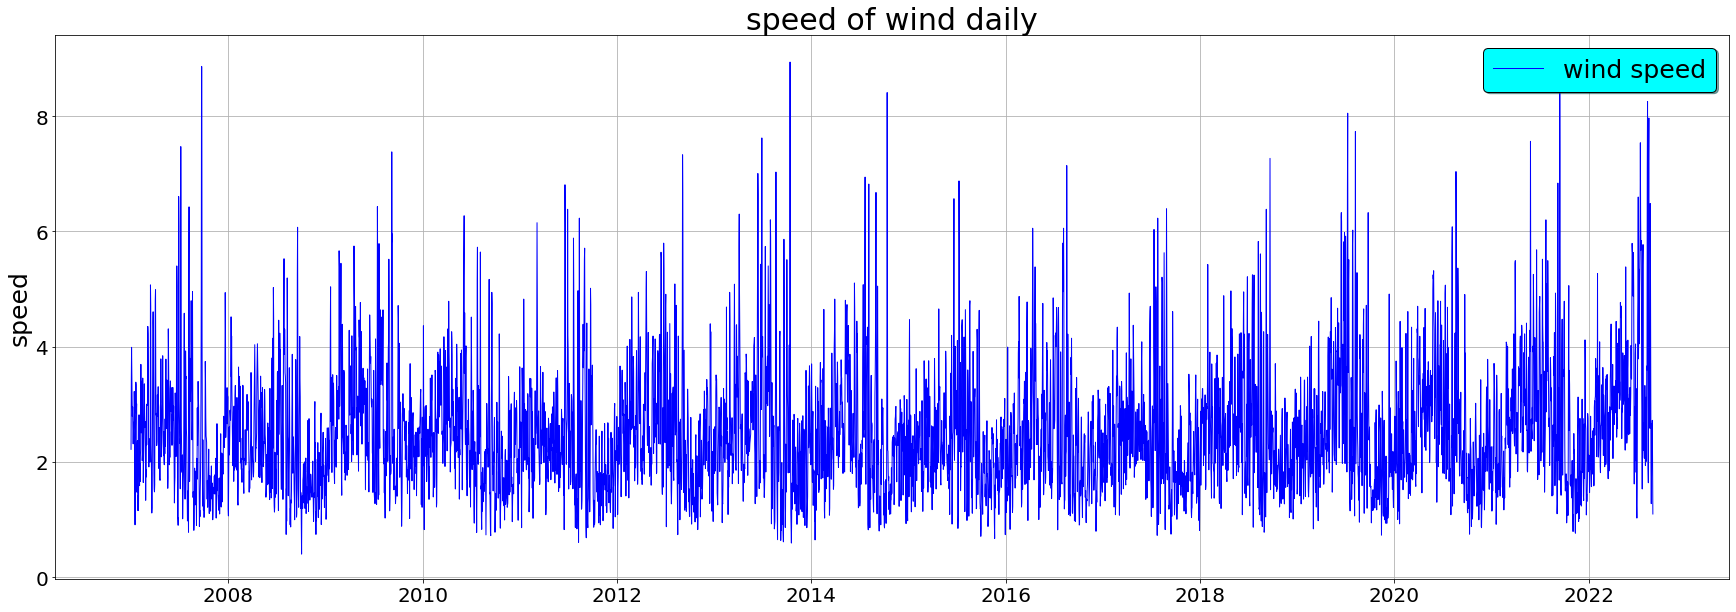

In [42]:
plt.figure(figsize = (30,10))
plt.grid(b=True, which='major', axis='both')
plt.title('speed of wind daily', fontsize = 30)
plt.plot(df_daily_mean.index, df_daily_mean['WindSpeed10m'], color='blue', label='wind speed', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('speed', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

C:\Users\upend\AppData\Local\Temp\ipykernel_6472\2051926769.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


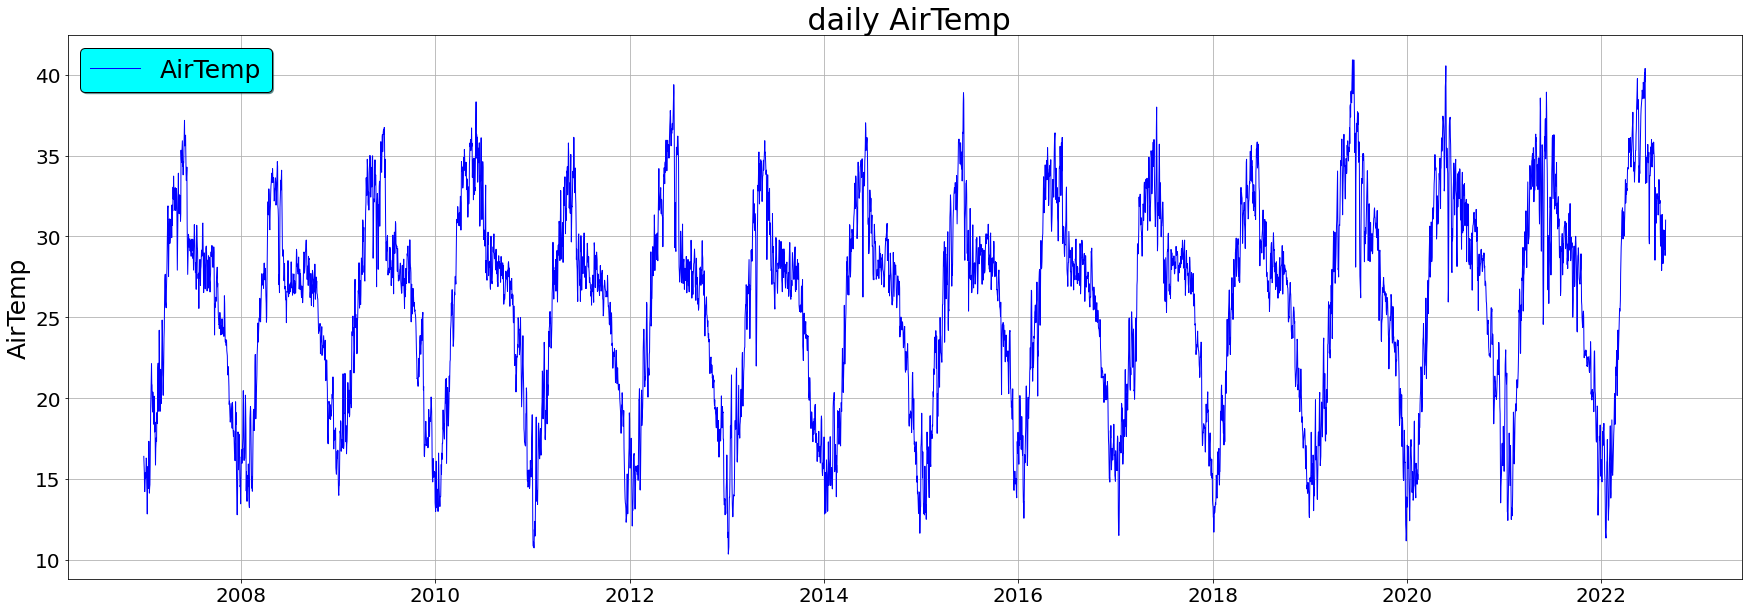

In [43]:
plt.figure(figsize = (30,10))
plt.grid(b=True, which='major', axis='both')
plt.title(' daily AirTemp', fontsize = 30)
plt.plot(df_daily_mean.index, df_daily_mean['AirTemp'], color='blue', label='AirTemp', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('AirTemp', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')

C:\Users\upend\AppData\Local\Temp\ipykernel_6472\209772054.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


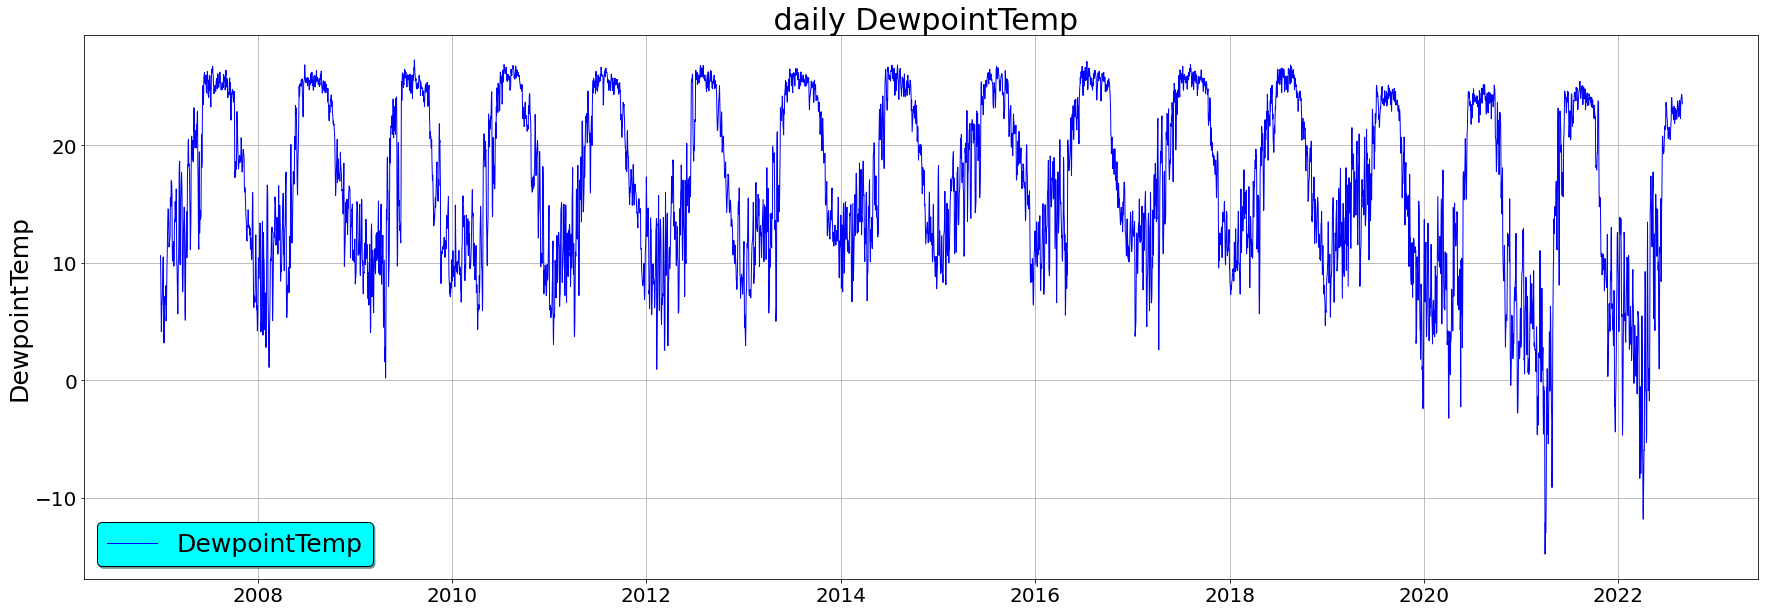

In [44]:
plt.figure(figsize = (30,10))
plt.grid(b=True, which='major', axis='both')
plt.title(' daily DewpointTemp', fontsize = 30)
plt.plot(df_daily_mean.index, df_daily_mean['DewpointTemp'], color='blue', label='DewpointTemp', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('DewpointTemp', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')

C:\Users\upend\AppData\Local\Temp\ipykernel_6472\650608419.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


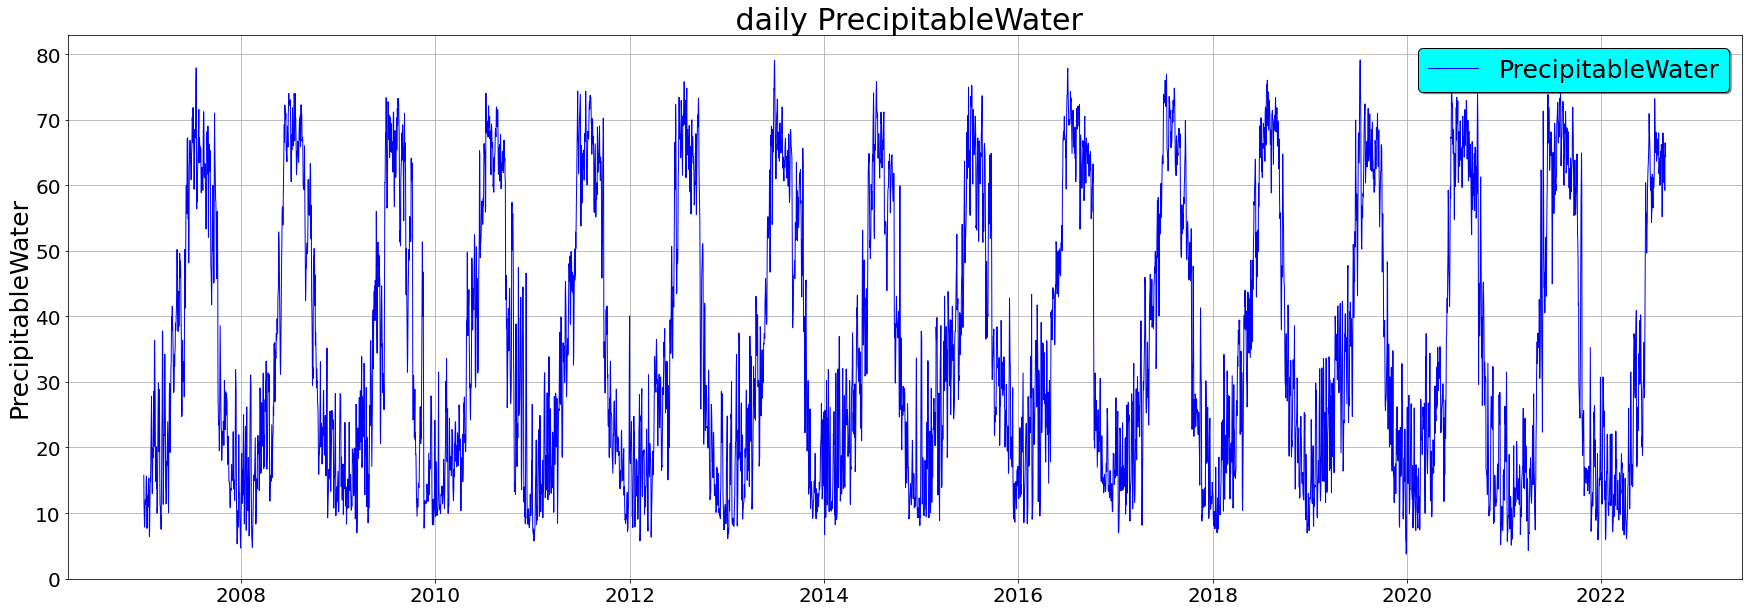

In [45]:
plt.figure(figsize = (30,10))
plt.grid(b=True, which='major', axis='both')
plt.title(' daily PrecipitableWater', fontsize = 30)
plt.plot(df_daily_mean.index, df_daily_mean['PrecipitableWater'], color='blue', label='PrecipitableWater', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('PrecipitableWater', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')

<AxesSubplot:xlabel='AirTemp', ylabel='WindSpeed10m'>

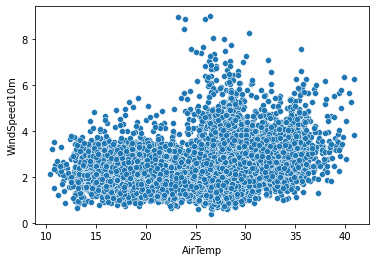

In [46]:
sns.scatterplot(y =df_daily_mean.WindSpeed10m,x =df_daily_mean.AirTemp)

<AxesSubplot:xlabel='DewpointTemp', ylabel='WindSpeed10m'>

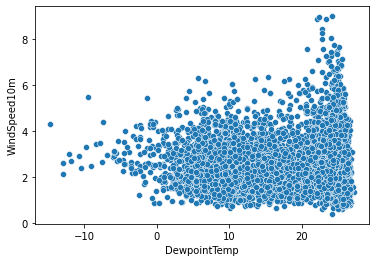

In [47]:
sns.scatterplot(y =df_daily_mean.WindSpeed10m,x =df_daily_mean.DewpointTemp)

<AxesSubplot:xlabel='RelativeHumidity', ylabel='WindSpeed10m'>

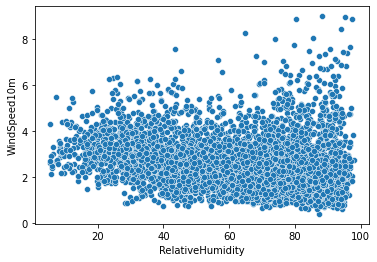

In [48]:
sns.scatterplot(y =df_daily_mean.WindSpeed10m,x =df_daily_mean.RelativeHumidity)

C:\Users\upend\AppData\Local\Temp\ipykernel_6472\1964454890.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


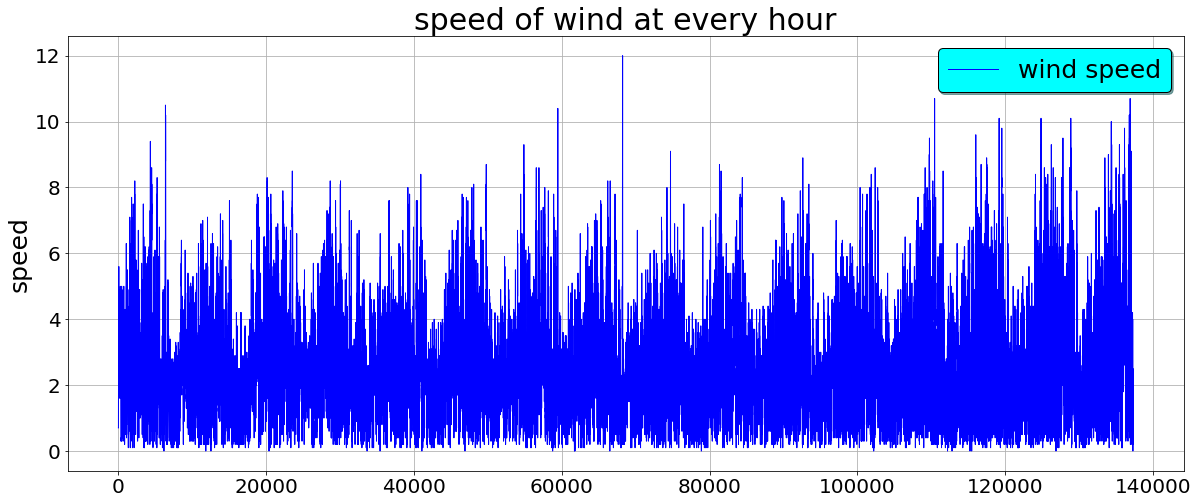

In [49]:
plt.figure(figsize = (20,8))
plt.grid(b=True, which='major', axis='both')
plt.title('speed of wind at every hour', fontsize = 30)
plt.plot(df.index, df['WindSpeed10m'], color='blue', label='wind speed', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('speed', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

C:\Users\upend\AppData\Local\Temp\ipykernel_6472\2833279672.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


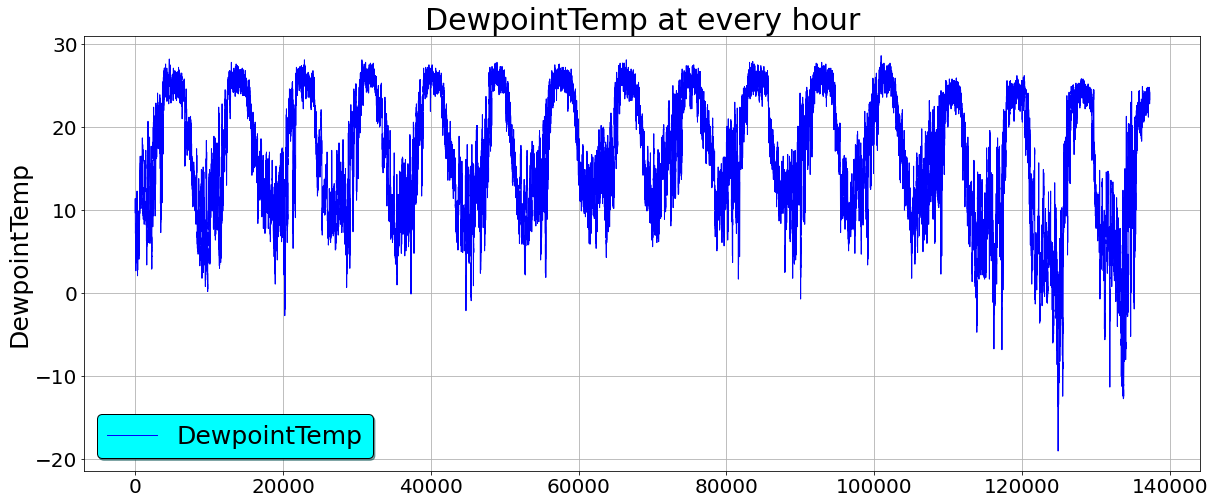

In [50]:
plt.figure(figsize = (20,8))
plt.grid(b=True, which='major', axis='both')
plt.title('DewpointTemp at every hour', fontsize = 30)
plt.plot(df.index, df['DewpointTemp'], color='blue', label='DewpointTemp', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('DewpointTemp', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

C:\Users\upend\AppData\Local\Temp\ipykernel_6472\2830794940.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


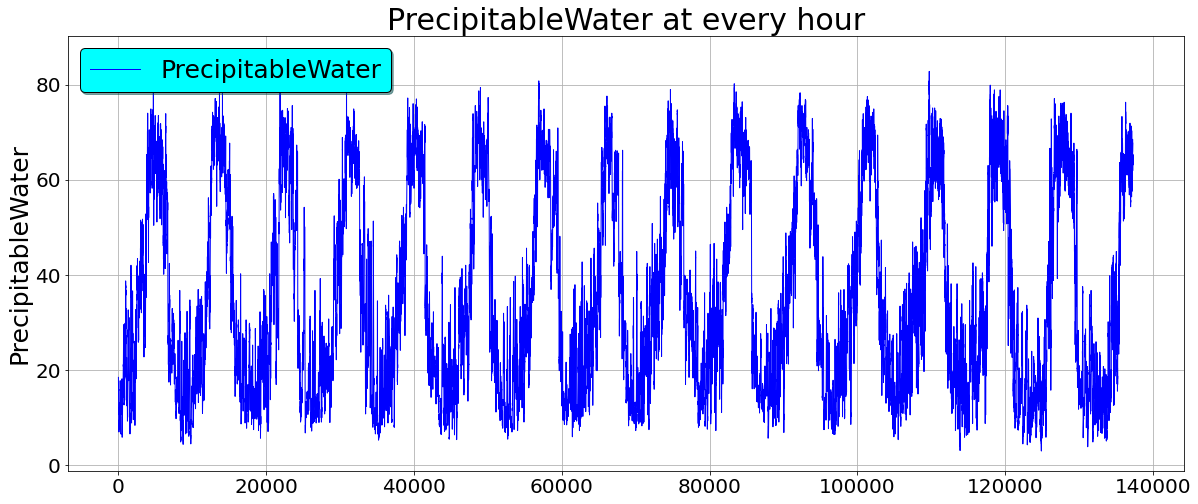

In [51]:
plt.figure(figsize = (20,8))
plt.grid(b=True, which='major', axis='both')
plt.title('PrecipitableWater at every hour', fontsize = 30)
plt.plot(df.index, df['PrecipitableWater'], color='blue', label='PrecipitableWater', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('PrecipitableWater', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

C:\Users\upend\AppData\Local\Temp\ipykernel_6472\2369675148.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both')


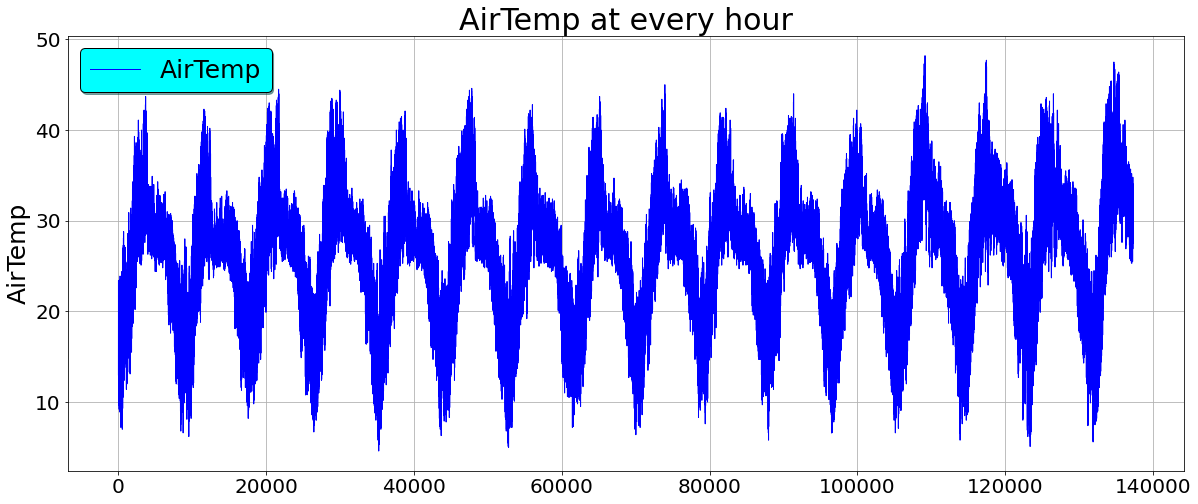

In [52]:
plt.figure(figsize = (20,8))
plt.grid(b=True, which='major', axis='both')
plt.title('AirTemp at every hour', fontsize = 30)
plt.plot(df.index, df['AirTemp'], color='blue', label='AirTemp', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('AirTemp', fontsize = 25)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [53]:

df.columns

Index(['PeriodEnd', 'PeriodStart', 'AirTemp', 'Azimuth', 'DewpointTemp',
       'GtiTracking', 'PrecipitableWater', 'RelativeHumidity',
       'SurfacePressure', 'WindDirection10m', 'WindSpeed10m', 'Zenith',
       'AlbedoDaily', 'week_day', 'time_hour', 'year', 'Date'],
      dtype='object')

C:\Users\upend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Zenith', ylabel='Azimuth'>

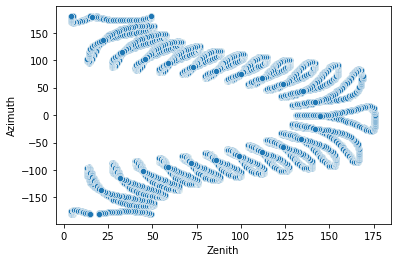

In [54]:
sns.scatterplot(df.Zenith,df.Azimuth)

In [55]:
data2 =df.groupby(['year']).mean()
data2

,AirTemp,Azimuth,DewpointTemp,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,time_hour
year,,,,,,,,,,,,
2007,25.242516,0.303573,17.678776,231.702820,35.784005,67.037858,992.993013,198.737185,2.468901,89.763329,0.190706,11.501313
2008,24.875444,0.269923,17.297837,220.718010,35.480020,67.867646,992.769262,202.006489,2.277436,89.802596,0.190408,11.500000
2009,25.767500,0.290868,16.643014,240.299087,33.595559,62.939509,992.691324,213.724772,2.755525,89.764498,0.190459,11.500000
2010,26.156473,0.290868,17.423607,229.221005,35.654155,64.700354,992.636016,200.379566,2.440947,89.764498,0.190523,11.500000
2011,24.868094,0.290868,17.345320,226.865297,35.559635,67.623402,992.570685,196.629680,2.365103,89.764498,0.191250,11.500000
2012,25.427880,0.269923,16.177630,229.916439,33.405829,62.747199,992.233413,218.596425,2.584939,89.802596,0.191045,11.500000
2013,24.743607,0.290868,17.976610,227.706849,36.247272,70.592146,992.900468,186.642694,2.613105,89.764498,0.190676,11.500000
2014,24.767306,0.290868,17.953653,228.626142,34.160947,70.225970,993.716324,209.877740,2.513699,89.764498,0.190433,11.500000
2015,25.518836,0.290868,18.882888,230.936301,36.713299,69.989897,994.163242,196.965525,2.361724,89.764498,0.190696,11.500000


In [56]:
df['month'] =df['PeriodStart'].dt.month

In [57]:
df

,PeriodEnd,PeriodStart,AirTemp,Azimuth,DewpointTemp,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,week_day,time_hour,year,Date,month
0,2007-01-01 02:00:00+00:00,2007-01-01 01:00:00+00:00,13.0,-117,9.7,25,18.4,80.2,1002.1,175,0.7,87,0.20,Monday,1,2007,2007-01-01,1
1,2007-01-01 03:00:00+00:00,2007-01-01 02:00:00+00:00,14.0,-125,10.2,265,18.3,77.9,1002.7,195,0.7,76,0.20,Monday,2,2007,2007-01-01,1
2,2007-01-01 04:00:00+00:00,2007-01-01 03:00:00+00:00,15.7,-134,10.5,552,18.1,71.2,1003.0,224,0.7,65,0.20,Monday,3,2007,2007-01-01,1
3,2007-01-01 05:00:00+00:00,2007-01-01 04:00:00+00:00,18.2,-147,10.6,631,18.0,61.4,1003.1,258,0.9,57,0.20,Monday,4,2007,2007-01-01,1
4,2007-01-01 06:00:00+00:00,2007-01-01 05:00:00+00:00,20.7,-162,10.8,644,17.9,53.1,1003.1,276,1.2,51,0.20,Monday,5,2007,2007-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137297,2022-08-30 19:00:00+00:00,2022-08-30 18:00:00+00:00,29.2,-1,23.2,0,64.4,70.1,997.7,249,2.3,145,0.18,Tuesday,18,2022,2022-08-30,8
137298,2022-08-30 20:00:00+00:00,2022-08-30 19:00:00+00:00,28.8,-25,23.1,0,64.3,71.6,997.2,243,2.5,142,0.18,Tuesday,19,2022,2022-08-30,8
137299,2022-08-30 21:00:00+00:00,2022-08-30 20:00:00+00:00,28.1,-44,23.3,0,64.4,75.2,996.7,235,2.5,134,0.18,Tuesday,20,2022,2022-08-30,8
137300,2022-08-30 22:00:00+00:00,2022-08-30 21:00:00+00:00,27.5,-58,23.4,0,64.4,77.9,996.2,235,2.3,124,0.18,Tuesday,21,2022,2022-08-30,8


In [58]:
data3 =df.groupby(['month']).mean()
data3

,AirTemp,Azimuth,DewpointTemp,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,time_hour,year
month,,,,,,,,,,,,,
1,15.693682,-5.923045,9.411602,161.244056,15.384424,68.917609,1002.639704,236.289003,2.366429,102.488196,0.195389,11.500966,2014.500630
2,19.415865,-4.617257,10.733730,234.561394,18.038339,60.849051,1000.473479,223.586652,2.498451,98.064712,0.187350,11.500000,2014.495575
3,25.442902,-5.818632,10.995514,292.795531,20.375118,45.564205,996.792834,237.717742,2.653276,91.324765,0.179135,11.500000,2014.500000
4,31.331727,3.601649,11.091536,317.581858,25.306493,34.103264,992.498438,224.024740,2.859453,84.130903,0.191720,11.500000,2014.500000
5,33.548589,6.012769,17.128511,311.676327,36.298303,41.907325,988.649941,179.041835,2.827201,78.760585,0.205652,11.500000,2014.500000
6,32.848915,3.760851,21.712257,237.479948,53.861693,57.434939,985.658854,177.849392,2.983229,76.415625,0.209659,11.500000,2014.500000
7,29.443926,-6.702621,25.006821,184.949681,66.787139,79.171245,985.775664,156.200017,3.046497,77.320144,0.194548,11.500000,2014.500000
8,28.649566,-4.027275,25.185672,190.562000,64.930238,82.617535,987.617148,159.987794,2.696229,81.475966,0.179043,11.499032,2014.484216
9,27.948917,5.667685,24.424583,199.235556,55.833694,82.193491,990.813056,167.290741,2.502491,88.013148,0.176628,11.500000,2014.000000


In [59]:
df

,PeriodEnd,PeriodStart,AirTemp,Azimuth,DewpointTemp,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,week_day,time_hour,year,Date,month
0,2007-01-01 02:00:00+00:00,2007-01-01 01:00:00+00:00,13.0,-117,9.7,25,18.4,80.2,1002.1,175,0.7,87,0.20,Monday,1,2007,2007-01-01,1
1,2007-01-01 03:00:00+00:00,2007-01-01 02:00:00+00:00,14.0,-125,10.2,265,18.3,77.9,1002.7,195,0.7,76,0.20,Monday,2,2007,2007-01-01,1
2,2007-01-01 04:00:00+00:00,2007-01-01 03:00:00+00:00,15.7,-134,10.5,552,18.1,71.2,1003.0,224,0.7,65,0.20,Monday,3,2007,2007-01-01,1
3,2007-01-01 05:00:00+00:00,2007-01-01 04:00:00+00:00,18.2,-147,10.6,631,18.0,61.4,1003.1,258,0.9,57,0.20,Monday,4,2007,2007-01-01,1
4,2007-01-01 06:00:00+00:00,2007-01-01 05:00:00+00:00,20.7,-162,10.8,644,17.9,53.1,1003.1,276,1.2,51,0.20,Monday,5,2007,2007-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137297,2022-08-30 19:00:00+00:00,2022-08-30 18:00:00+00:00,29.2,-1,23.2,0,64.4,70.1,997.7,249,2.3,145,0.18,Tuesday,18,2022,2022-08-30,8
137298,2022-08-30 20:00:00+00:00,2022-08-30 19:00:00+00:00,28.8,-25,23.1,0,64.3,71.6,997.2,243,2.5,142,0.18,Tuesday,19,2022,2022-08-30,8
137299,2022-08-30 21:00:00+00:00,2022-08-30 20:00:00+00:00,28.1,-44,23.3,0,64.4,75.2,996.7,235,2.5,134,0.18,Tuesday,20,2022,2022-08-30,8
137300,2022-08-30 22:00:00+00:00,2022-08-30 21:00:00+00:00,27.5,-58,23.4,0,64.4,77.9,996.2,235,2.3,124,0.18,Tuesday,21,2022,2022-08-30,8


In [60]:
series =pd.DataFrame(df['time_hour'])

In [61]:
series['speed'] =df['WindSpeed10m']

In [62]:
series.describe()

,time_hour,speed
count,137302.000000,137302.000000
mean,11.500000,2.537125
std,6.922123,1.367639
min,0.000000,0.000000
25%,6.000000,1.600000
50%,11.500000,2.300000
75%,17.000000,3.100000
max,23.000000,12.000000


<AxesSubplot:xlabel='time_hour', ylabel='speed'>

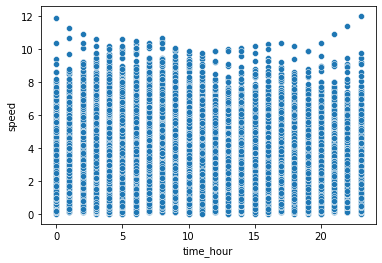

In [63]:
sns.scatterplot(y=series.speed, x=series.time_hour)

In [64]:
series['month'] =df['month']

In [65]:
series['year'] =df['year']

In [66]:
series.head(23)


,time_hour,speed,month,year
0,1,0.7,1,2007
1,2,0.7,1,2007
2,3,0.7,1,2007
3,4,0.9,1,2007
4,5,1.2,1,2007
5,6,1.7,1,2007
6,7,2.2,1,2007
7,8,2.7,1,2007
8,9,2.9,1,2007
9,10,2.7,1,2007


In [67]:
series.iloc[0:24]['speed'].mean()

2.2375000000000003

In [68]:
series.shape

(137302, 4)

In [69]:

a=0
b=23
up=0
daily_average =[]
for i in range(0,len(series.iloc[:])-24,23):
    c=series.iloc[a:b]['speed'].mean()
    a=a+23
    b=b+23
    daily_average.append(c)
print(len(daily_average))
    
    
   

5969


In [70]:
len(series.iloc[a:23])

0

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

#Read the csv file
df = pd.read_csv('')
print(df.head()) #7 columns, including the Date. 

#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates. 

#Variables for training
cols = list(df)[1:6]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])